In [2]:
cd ../../task_01/pipelines

/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_01/pipelines


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection

In [119]:
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv")
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')
srs = pd.read_csv('../../../data/HBN_srs.csv')
outliers = pd.read_csv('../../../data/outliers.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103

In [120]:
df_beha

,Anonymized.ID,Subject.Type,Visit,Days.since.enrollment,EID,START_DATE,Patient_ID,Enrollment.Year,Enrollment.Season,Sex,...,YSR_TP,YSR_TP_T,YSR_Ext,YSR_Ext_T,YSR_Int,YSR_Int_T,YSR_OP,YSR_C,YSR_Total,YSR_Total_T
0,A00078864,UNKNOWN,V1,0,NDARYM832PX3,1901-01-01T07:00:00Z,NDARYM832PX3,2015,Spring,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A00078865,UNKNOWN,V1,0,NDARNJ687DMC,1901-01-01T07:00:00Z,NDARNJ687DMC,2015,Spring,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A00078866,UNKNOWN,V1,0,NDARRM363BXZ,1901-01-01T07:00:00Z,NDARRM363BXZ,2015,Spring,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A00078867,UNKNOWN,V1,0,NDARUW586LLL,1901-01-01T07:00:00Z,NDARUW586LLL,2015,Spring,1,...,15.0,75.0,16.0,60.0,29.0,68.0,8.0,40.0,85.0,68.0
4,A00078868,UNKNOWN,V1,0,NDARDC298NW4,1901-01-01T07:00:00Z,NDARDC298NW4,2015,Spring,0,...,9.0,67.0,10.0,52.0,26.0,72.0,11.0,34.0,70.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,A00093557,UNKNOWN,V1,0,NDARYZ986HEW,1901-01-01T07:00:00Z,NDARYZ986HEW,2018,Summer,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2092,A00093558,UNKNOWN,V1,0,NDARPM572ZZV,1901-01-01T07:00:00Z,NDARPM572ZZV,2018,Summer,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2093,A00093559,UNKNOWN,V1,0,NDARYA955CY1,1901-01-01T07:00:00Z,NDARYA955CY1,2018,Fall,0,...,6.0,60.0,11.0,53.0,13.0,59.0,3.0,23.0,47.0,58.0
2094,A00093560,UNKNOWN,V1,0,NDARRT283RHB,1901-01-01T07:00:00Z,NDARRT283RHB,2018,Fall,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
s_in = df_beha[['SWAN_IN_Avg' , 'Age', 'Patient_ID', 'Sex']]

In [122]:
s = df_beha[['Age', 'Patient_ID', 'Sex', 'Enrollment.Year', 'Study.Site']]
#s = s[~s_in['SWAN_IN_Avg'].isnull()]

In [123]:
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_label_spectro_cluster = pd.merge(s, df_spectro_cluster, on='Patient_ID')

df_label_spectro_cluster = fill_with_median(df_label_spectro_cluster)

In [124]:
less_18 = df_label_spectro_cluster['Age'] <= 18.0
df_label_spectro_cluster = df_label_spectro_cluster[less_18]

In [416]:
df_label_spectro_cluster = df_label_spectro_cluster[~df_label_spectro_cluster.Patient_ID.isin(outliers.Patient_ID)]

In [125]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = \
train_test_split(df_label_spectro_cluster.drop(['Age', 'Sex', 'Enrollment.Year','Study.Site', #'SWAN_IN_Avg' , 'SWAN_HY_Avg', 
                                                'Patient_ID'], 
                                               axis=1
                                              ).to_numpy(), 
                 df_label_spectro_cluster[[ 'Age', 'Sex', 'Enrollment.Year','Study.Site','Patient_ID'#'SWAN_IN_Avg', 'SWAN_HY_Avg'
                                          ]].to_numpy(), test_size=0.2, random_state = 0)
mean = x_train.mean(axis=0)
x_train -= mean
x_test -= mean

In [299]:
import keras
from keras import layers
encoding_dim = 20

# This is our input image
input_img = keras.Input(shape=(len(x_train[0]),))
# "encoded" is the encoded representation of the input
encoded1 = layers.Dense(30, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim)(encoded1)
# "decoded" is the lossy reconstruction of the input
decoded1 = layers.Dense(20, activation='relu')(encoded)
decoded = layers.Dense(len(x_train[0]))(decoded1)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [300]:
autoencoder.compile(optimizer='adam', loss='mse')


In [301]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
31/31 [==============================] - 0s 11ms/step - loss: 5.5489 - val_loss: 5.6189
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 4.1546 - val_loss: 3.4394
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 2.5543 - val_loss: 2.0868
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 1.7075 - val_loss: 1.6569
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 1.4362 - val_loss: 1.5111
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 1.3227 - val_loss: 1.4191
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 1.2430 - val_loss: 1.3707
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 1.1889 - val_loss: 1.3000
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 1.1386 - val_loss: 1.2611
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 1.0923 - val_loss: 1.2269
Epoch 11

31/31 [==============================] - 0s 2ms/step - loss: 0.4375 - val_loss: 0.5176
Epoch 84/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4318 - val_loss: 0.5154
Epoch 85/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4309 - val_loss: 0.5130
Epoch 86/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4304 - val_loss: 0.5112
Epoch 87/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4275 - val_loss: 0.5052
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4260 - val_loss: 0.5113
Epoch 89/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4258 - val_loss: 0.5063
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4231 - val_loss: 0.5042
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4204 - val_loss: 0.5027
Epoch 92/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4212 - val_loss: 0.5000
Epoch 93/100


In [302]:
encoded_imgs = encoder.predict(x_train)

In [303]:
encoded_imgs

array([[-12.774323  ,   2.8178434 ,  -3.2650325 , ...,  -1.197533  ,
         -0.1378973 , -11.983302  ],
       [-13.391105  ,  14.086923  ,  -0.6518757 , ...,   5.1247864 ,
          7.5698757 , -16.226852  ],
       [-26.950933  ,   0.48583934,   3.688951  , ...,  17.333511  ,
          2.8240464 , -21.763573  ],
       ...,
       [ -1.4130638 ,  10.477201  ,  -2.3709116 , ...,   1.8851991 ,
         -9.430744  ,   4.3818216 ],
       [ -0.7846723 ,   9.984446  ,  -8.359122  , ...,  -3.1532383 ,
        -15.465904  ,   1.7813027 ],
       [-13.550791  ,   2.9381912 ,  -3.8214679 , ...,  15.6482315 ,
          6.515706  , -19.155518  ]], dtype=float32)

In [304]:
from yellowbrick.contrib import ScatterVisualizer

IndexError: list index out of range

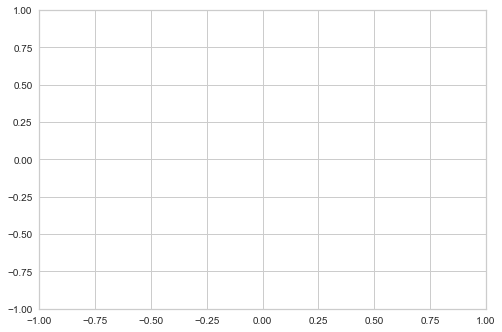

In [306]:
visualizer = ScatterVisualizer(x="x", y="y")
visualizer.fit(encoded_imgs[:, :2], y_train[:, 0].astype(int))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x15e907290>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

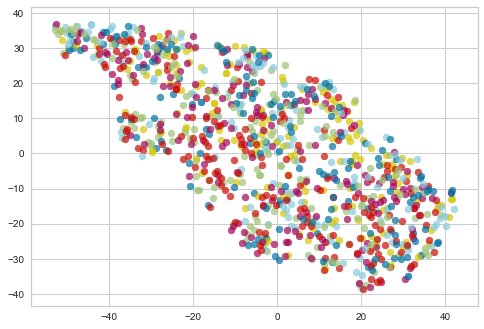

In [308]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(decompose=None)
tsne.fit(encoded_imgs, y_train[:, 0].astype(int))

In [309]:
from sklearn import svm
svr= svm.SVR(kernel = 'rbf', C=10)
#parameters = {'kernel' : ( 'rbf' , 'poly', 'linear', 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto', 10e-2, 10e-1, 1, 2]}
#clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
svr.fit(encoded_imgs , y_train[:,0])


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [310]:
import sklearn
sklearn.metrics.mean_squared_error(y_test[:,0] , svr.predict(encoder.predict(x_test)))

9.290787427501494

In [ ]:
svr_final = svm.SVR(kernel = best_param['kernel'] , C = best_param['C'])
svr_final.fit(x_train , y_train)
test_mse_svm = sklearn.metrics.mean_squared_error(y_test , svr_final.predict(x_test))

In [11]:
import keras
from keras import layers

latent_dim = 15

inputs = keras.Input(shape=(len(x_train[0]),))
h = layers.Dense(30, activation='relu')(inputs)
#h = layers.Dense(30, activation='relu')(h1)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [12]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [13]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(30, activation='relu')(latent_inputs)
outputs = layers.Dense(len(x_train[0]))(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [14]:
from tensorflow import keras
reconstruction_loss = keras.losses.mean_squared_error(inputs, outputs)
reconstruction_loss *= len(x_train[0])
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + 5.0 * kl_loss)
vae.add_loss(vae_loss)
opt = keras.optimizers.Adam(learning_rate=0.001)
vae.compile(optimizer=opt)

In [15]:
vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 15), (None,  9960        input_1[0][0]                    
__________________________________________________________________________________________________
decoder (Model)                 (None, 300)          9780        encoder[1][2]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           9030        input_1[0][0]                    
____________________________________________________________________________________________

In [183]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

x_train2 = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test2 = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#redonplat = ReduceLROnPlateau(monitor="loss", mode="min", patience=100, verbose=2)
vae.fit(x_train2, x_train2,
        epochs=1000,
        batch_size=64,
        shuffle=True,
        #callbacks=[redonplat],
        validation_data=(x_test2, x_test2))

Epoch 1/1000
16/16 [==============================] - 0s 7ms/step - loss: 104.3057 - val_loss: 138.3549
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 104.7442 - val_loss: 138.5767
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 104.7512 - val_loss: 139.0164
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 105.4113 - val_loss: 139.5502
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 105.3561 - val_loss: 141.4877
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 105.0082 - val_loss: 138.8379
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 104.6593 - val_loss: 139.9055
Epoch 8/1000
16/16 [==============================] - 0s 4ms/step - loss: 104.5488 - val_loss: 139.9327
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 105.1055 - val_loss: 139.4374
Epoch 10/1000
16/16 [==============================] - 0s 3ms/st

16/16 [==============================] - 0s 3ms/step - loss: 103.6156 - val_loss: 139.6543
Epoch 80/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.5747 - val_loss: 139.1240
Epoch 81/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.7094 - val_loss: 140.3082
Epoch 82/1000
16/16 [==============================] - 0s 3ms/step - loss: 105.2729 - val_loss: 140.7842
Epoch 83/1000
16/16 [==============================] - 0s 3ms/step - loss: 107.0485 - val_loss: 141.9299
Epoch 84/1000
16/16 [==============================] - 0s 3ms/step - loss: 108.6556 - val_loss: 141.8013
Epoch 85/1000
16/16 [==============================] - 0s 3ms/step - loss: 106.5518 - val_loss: 140.7714
Epoch 86/1000
16/16 [==============================] - 0s 3ms/step - loss: 104.7498 - val_loss: 138.4568
Epoch 87/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.7664 - val_loss: 138.9446
Epoch 88/1000
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 106.1783 - val_loss: 138.8216
Epoch 157/1000
16/16 [==============================] - 0s 3ms/step - loss: 104.7119 - val_loss: 139.7820
Epoch 158/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.7473 - val_loss: 140.1333
Epoch 159/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.7818 - val_loss: 138.7043
Epoch 160/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.5502 - val_loss: 140.5612
Epoch 161/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.3797 - val_loss: 139.4429
Epoch 162/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.2217 - val_loss: 140.1095
Epoch 163/1000
16/16 [==============================] - 0s 3ms/step - loss: 104.4351 - val_loss: 140.8475
Epoch 164/1000
16/16 [==============================] - 0s 3ms/step - loss: 105.4016 - val_loss: 144.0300
Epoch 165/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 103.7079 - val_loss: 140.7230
Epoch 234/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.5437 - val_loss: 140.8082
Epoch 235/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.8992 - val_loss: 141.1836
Epoch 236/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.9113 - val_loss: 140.9583
Epoch 237/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.6675 - val_loss: 140.2966
Epoch 238/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.9546 - val_loss: 139.8430
Epoch 239/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.7997 - val_loss: 141.2781
Epoch 240/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.5866 - val_loss: 140.8998
Epoch 241/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.0138 - val_loss: 141.2534
Epoch 242/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 103.3647 - val_loss: 141.1721
Epoch 311/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.6350 - val_loss: 140.6760
Epoch 312/1000
16/16 [==============================] - 0s 3ms/step - loss: 104.5033 - val_loss: 141.6650
Epoch 313/1000
16/16 [==============================] - 0s 3ms/step - loss: 104.0239 - val_loss: 140.0649
Epoch 314/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.5490 - val_loss: 139.5331
Epoch 315/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.4680 - val_loss: 141.6516
Epoch 316/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.8585 - val_loss: 141.7979
Epoch 317/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.0163 - val_loss: 141.3595
Epoch 318/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.7705 - val_loss: 142.0554
Epoch 319/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 102.9908 - val_loss: 142.5970
Epoch 388/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.2085 - val_loss: 141.1483
Epoch 389/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.9790 - val_loss: 139.9661
Epoch 390/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.8912 - val_loss: 140.3136
Epoch 391/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.7137 - val_loss: 140.6737
Epoch 392/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.0237 - val_loss: 140.4125
Epoch 393/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.7739 - val_loss: 140.1375
Epoch 394/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.0280 - val_loss: 140.6833
Epoch 395/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.3311 - val_loss: 140.5145
Epoch 396/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 102.0143 - val_loss: 140.8661
Epoch 465/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.2979 - val_loss: 140.8652
Epoch 466/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.5715 - val_loss: 141.0054
Epoch 467/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.1722 - val_loss: 141.0513
Epoch 468/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.0418 - val_loss: 140.6692
Epoch 469/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.4574 - val_loss: 140.5550
Epoch 470/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.5051 - val_loss: 139.3569
Epoch 471/1000
16/16 [==============================] - 0s 3ms/step - loss: 103.2691 - val_loss: 139.8626
Epoch 472/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.8147 - val_loss: 142.8659
Epoch 473/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 102.0840 - val_loss: 141.4644
Epoch 542/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.9106 - val_loss: 140.4879
Epoch 543/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.8112 - val_loss: 145.4455
Epoch 544/1000
16/16 [==============================] - 0s 3ms/step - loss: 104.4274 - val_loss: 144.8933
Epoch 545/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.7392 - val_loss: 141.0421
Epoch 546/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.7330 - val_loss: 139.8238
Epoch 547/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.1499 - val_loss: 139.7293
Epoch 548/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.8471 - val_loss: 138.5152
Epoch 549/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.7386 - val_loss: 139.6942
Epoch 550/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 101.5871 - val_loss: 141.4420
Epoch 619/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.3158 - val_loss: 139.2080
Epoch 620/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.7616 - val_loss: 139.4208
Epoch 621/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.4442 - val_loss: 140.3984
Epoch 622/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.8495 - val_loss: 141.7679
Epoch 623/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.1570 - val_loss: 140.3868
Epoch 624/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.9231 - val_loss: 142.4059
Epoch 625/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.9969 - val_loss: 140.9219
Epoch 626/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.9976 - val_loss: 140.5862
Epoch 627/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 102.3073 - val_loss: 142.5403
Epoch 696/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.6831 - val_loss: 140.2782
Epoch 697/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.3318 - val_loss: 140.9407
Epoch 698/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.6767 - val_loss: 140.5746
Epoch 699/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.7160 - val_loss: 140.8215
Epoch 700/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.3787 - val_loss: 141.2880
Epoch 701/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.4914 - val_loss: 141.6089
Epoch 702/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.2592 - val_loss: 139.6153
Epoch 703/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.3370 - val_loss: 140.7809
Epoch 704/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 101.6960 - val_loss: 140.9408
Epoch 773/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.1787 - val_loss: 141.2341
Epoch 774/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.4212 - val_loss: 143.4190
Epoch 775/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.4326 - val_loss: 142.6490
Epoch 776/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.5617 - val_loss: 141.6351
Epoch 777/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.6435 - val_loss: 141.5502
Epoch 778/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.6626 - val_loss: 143.7742
Epoch 779/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.6845 - val_loss: 141.1383
Epoch 780/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.5139 - val_loss: 140.5647
Epoch 781/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 100.7659 - val_loss: 141.1759
Epoch 850/1000
16/16 [==============================] - 0s 4ms/step - loss: 100.9871 - val_loss: 142.2911
Epoch 851/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.0222 - val_loss: 143.3069
Epoch 852/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.5533 - val_loss: 143.1686
Epoch 853/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.8435 - val_loss: 143.6603
Epoch 854/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.1831 - val_loss: 143.3792
Epoch 855/1000
16/16 [==============================] - 0s 3ms/step - loss: 102.4439 - val_loss: 144.1168
Epoch 856/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.4650 - val_loss: 141.4234
Epoch 857/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.2391 - val_loss: 142.9103
Epoch 858/1000
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 101.0137 - val_loss: 139.0151
Epoch 927/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.3090 - val_loss: 142.2532
Epoch 928/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.0646 - val_loss: 139.1421
Epoch 929/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.2370 - val_loss: 139.9828
Epoch 930/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.7537 - val_loss: 140.3869
Epoch 931/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.2096 - val_loss: 141.0727
Epoch 932/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.0226 - val_loss: 141.6306
Epoch 933/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.6387 - val_loss: 141.6024
Epoch 934/1000
16/16 [==============================] - 0s 3ms/step - loss: 101.1721 - val_loss: 140.6665
Epoch 935/1000
16/16 [==============================] - 0s 3m

In [184]:
import sklearn
sklearn.metrics.mean_squared_error(x_train, vae.predict(x_train)), sklearn.metrics.mean_squared_error(x_test, vae.predict(x_test))

(0.2923804846059714, 0.42345590640730957)

In [48]:
encoded_imgs = encoder.predict(x_train)[2]

In [98]:
encoded_imgs_test = encoder.predict(x_test)[2]

In [145]:
encoded_imgs

array([[-0.4883436 , -0.23122829, -0.7012392 , ...,  0.16383597,
         0.43963528, -0.11046278],
       [ 0.30479425,  0.5810797 , -0.28450656, ..., -0.15640128,
         0.04729738, -0.5952371 ],
       [ 0.24898827,  0.03575766, -0.15555695, ...,  0.08675948,
        -0.24101752,  0.47246584],
       ...,
       [-0.00279886,  0.00357131, -0.17327061, ...,  0.07717106,
         0.551885  , -0.65478015],
       [ 0.08429202, -0.13982596,  0.41601297, ...,  0.13349754,
         0.40789005,  0.48722148],
       [ 0.19216874,  0.4722469 , -0.1347808 , ..., -0.19945076,
         0.43635935, -0.6016027 ]], dtype=float32)

In [150]:
y_train[:, 3]

array([1, 1, 3, ..., 3, 1, 3], dtype=object)

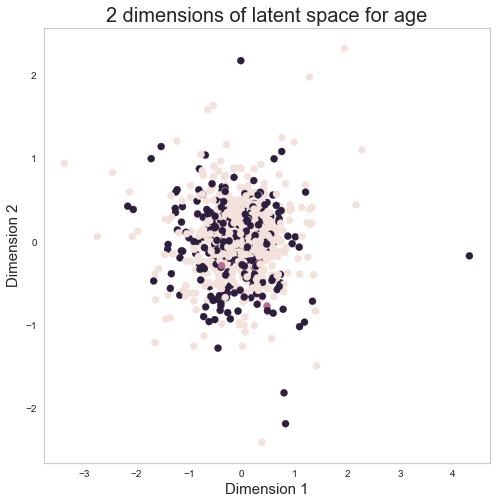

In [152]:
from yellowbrick.contrib import ScatterVisualizer
y = (y_train[:, 3] )

df = pd.DataFrame(data = encoded_imgs[:, [1,7]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for age', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=50, cmap=cmap)
#ax.legend(target_val)
ax.grid()

#plt.savefig('plot_age_beta_vae.png')
plt.show()

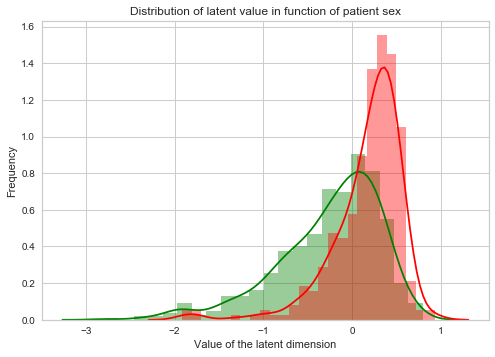

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
s1 = encoded_imgs[:, 3][y_train[:, 1] == 0]
s2 = encoded_imgs[:, 3][y_train[:, 1] == 1]
#plt.hist(np.abs(s1), 50, facecolor='green', density=True, alpha=0.2)
#plt.hist(np.abs(s2), 50, facecolor='green', density=True, alpha=0.2)
sns.distplot(s1, hist = True, color = 'green')
sns.distplot(s2, hist = True, color = 'red')
plt.xlabel('Value of the latent dimension')
plt.ylabel('Frequency')
plt.title('Distribution of latent value in function of patient sex')
plt.savefig('beta_vae_sex_distribution.png')
plt.show()

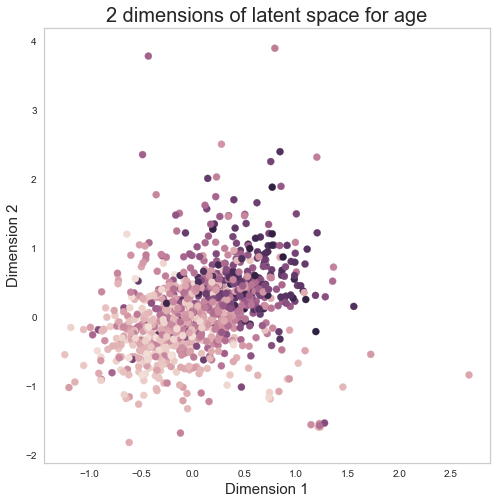

In [106]:
y = (y_train[:, 0] )/18.0

df = pd.DataFrame(data = encoded_imgs[:, [5,10]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for age', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=50, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_age_beta_vae.png')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x14bc47f90>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

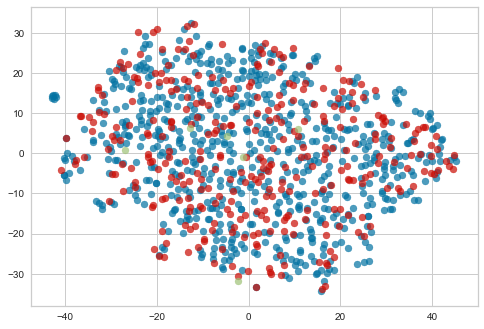

In [139]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(decompose=None)
tsne.fit(encoded_imgs, y_train[:, 3].astype(int))

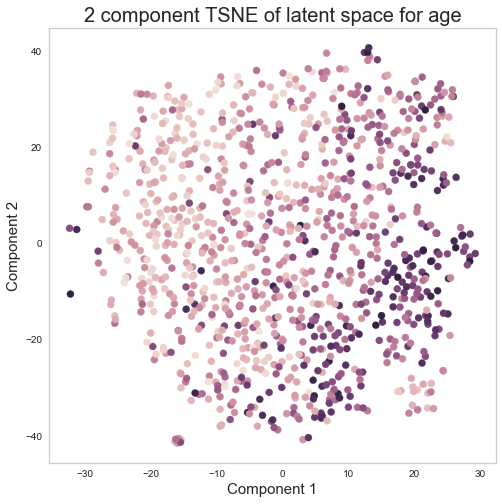

In [176]:
from sklearn.manifold import TSNE
import random
import seaborn as sns

X_r = TSNE(n_components=2).fit_transform(encoded_imgs)
y = (y_train[:, 0] )/18.0

df = pd.DataFrame(data = X_r,
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component TSNE of latent space for age', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=50, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_tnse_age_beta_vae.png')
plt.show()

In [72]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(encoded_imgs , y_train[:,0])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [73]:
clf.best_score_

-5.454403546664072

In [74]:
sklearn.metrics.mean_squared_error(y_test[:,0] , clf.predict(encoder.predict(x_test)[2]))
                                   #np.clip(clf.predict(np.hstack((encoder.predict(x_test)[2], y_test[:,0].reshape((-1, 1))))), a_min = -3, a_max = 3))

5.338691804895488

In [ ]:
clf.predict(np.hstack((encoder.predict(x_test)[2], y_test[:,0].reshape((-1, 1)))))

In [293]:
y = np.zeros(len(y_test))
y = y + np.mean(y_train[:,1])
sklearn.metrics.mean_squared_error(y, y_test[:,1])

1.5499294409758442

In [75]:
vae.save("/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_02/vae")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_02/vae/assets


In [76]:
encoder.save("/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_02/encoder")

INFO:tensorflow:Assets written to: /Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_02/encoder/assets


In [140]:
from sklearn.linear_model import Lasso, LassoCV
lasso = linear_model.Lasso(alpha=0.023)
lasso.fit(encoded_imgs , y_train[:,3])

Lasso(alpha=0.023, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
lasso.coef_

array([ 0.        , -0.01337508,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.01403117, -0.        , -0.        ,
       -0.00758366,  0.        ,  0.        , -0.        ,  0.        ],
      dtype=float32)

In [83]:
lasso.get_params

<bound method BaseEstimator.get_params of Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>

In [84]:
sklearn.metrics.mean_squared_error(y_test[:,0] , lasso.predict(encoder.predict(x_test)[2]))

6.869724380982355

In [153]:
from sklearn.linear_model import LinearRegression
lin = linear_model.LinearRegression()
lin.fit(encoded_imgs , y_train[:,3])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
lin.coef_

array([ 0.07422203, -0.12182349,  0.07890914,  0.12452573,  0.08223483,
       -0.01087652,  0.01812555, -0.15468417, -0.07737702, -0.03883296,
       -0.1230804 ,  0.01880307, -0.01158578, -0.09581756,  0.0525371 ],
      dtype=float32)

In [155]:
sklearn.metrics.mean_squared_error(y_test[:,3] , lin.predict(encoded_imgs_test))

0.8699067179429215

In [63]:
np.mean(encoded_imgs,axis=0)

array([ 0.02203513, -0.0780614 ,  0.01593466, -0.11011339,  0.0140391 ,
        0.0732329 ,  0.00084158,  0.0332479 ,  0.00670818,  0.02185106,
        0.1063301 , -0.01257593,  0.0225396 , -0.06751614,  0.09054071],
      dtype=float32)

In [64]:
np.std(encoded_imgs,axis=0)

array([0.4124717 , 0.5641305 , 0.43876067, 0.56688374, 0.47274593,
       0.47493184, 0.42529508, 0.42952022, 0.4016196 , 0.39883932,
       0.5922622 , 0.43172053, 0.44759113, 0.5617351 , 0.6705704 ],
      dtype=float32)

In [181]:
new_x_train = np.hstack((encoded_imgs,  y_train[:,-1].reshape((-1, 1))))
pd.DataFrame(new_x_train).rename(columns={15: "Patient_ID"}).to_csv("/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data/x_train_latent.csv")

In [182]:
new_x_test = np.hstack((encoded_imgs_test,  y_test[:,-1].reshape((-1, 1))))
pd.DataFrame(new_x_test).rename(columns={15: "Patient_ID"}).to_csv("/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data/x_test_latent.csv")